In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"romanyn36","key":"0273280af48cbf5753443b7cb64808be"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:18<00:00, 169MB/s]
100% 2.29G/2.29G [00:18<00:00, 134MB/s]


In [ ]:
# import zipfile

# with zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r') as zip_ref:
#       zip_ref.extractall('/content/chest-xray-pneumonia')
  

In [ ]:
!kaggle datasets download -d paultimothymooney/kermany2018

100% 10.8G/10.8G [00:52<00:00, 260MB/s]
100% 10.8G/10.8G [00:53<00:00, 220MB/s]


In [ ]:
# # %cd ..
%cd '/content/kermany2018/oct2017/OCT2017 '
%ls 


/content/kermany2018/oct2017/OCT2017 
test/  train/  val/


In [ ]:
# %ls '/content/kermany2018/oct2017/OCT2017 '
%ls '/content/kermany2018/OCT2017 '

test/  train/  val/


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import zipfile

with zipfile.ZipFile('/content/kermany2018.zip', 'r') as zip_ref:
      zip_ref.extractall('/content/kermany2018')
  

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
import os
from tqdm import tqdm
import cv2
import random
import pickle as pk
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
from keras.models import load_model
from keras.layers import BatchNormalization

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras import regularizers


In [ ]:
imges_num=50000
class_num=10
FAST_RUN = False
IMAGE_WIDTH=220
IMAGE_HEIGHT=220
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# training 

In [ ]:
trainingPath="/content/kermany2018/OCT2017 /train"
categories=os.listdir(trainingPath)
# print(categories)
categories

['DRUSEN', 'CNV', 'DME', 'NORMAL']

In [ ]:
# categories=['elefante','farfalla','cavallo','gatto','scoiattolo']

In [ ]:
classnames={}
for i in range(4):
  classnames[i]=categories[i]
classnames

{0: 'DRUSEN', 1: 'CNV', 2: 'DME', 3: 'NORMAL'}

In [ ]:
training =[]
x=0

for category in categories:
    folder=os.path.join(trainingPath,category)
    # print(folder)
    x2=0 
    for file in tqdm(os.listdir(folder)):
        # print(file)
        try:
            img=cv2.imread(os.path.join(folder,file))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,IMAGE_SIZE)# size image for CNN input
            classNum=categories.index(category) #detrmine class
            training.append([img,classNum])
            # plt.imshow(img)
            # plt.show()
        except Exception as e:
            pass
        
        if x2>imges_num:
            break
        x2+=1
    
    if x>=class_num-1:    
        break
    x+=1
    # print(x)

 72%|███████▏  | 18853/26315 [01:46<10:00, 12.42it/s]

In [ ]:
len(training)

In [ ]:
training[0]
random.shuffle(training)
for trainSample in training[:10]:
    print(trainSample[1])
    
# image_classes = [item[1] for item in training]
# image_classes

In [ ]:
x_train_data=[]
y_train_data=[]
for feature,label in training:
    x_train_data.append(feature)
    y_train_data.append(label)
    

In [ ]:
x_train_data=np.array(x_train_data)
y_train_data=np.array(y_train_data)

In [ ]:
x_train_data=x_train_data.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)
# print(x_train_data[0])
print(x_train_data.shape)
# print(y_train_data[:10])
print(y_train_data.shape)

(5216, 220, 220, 3)
(5216,)


# validation

In [ ]:
validationPath="/content/chest-xray-pneumonia/chest_xray/val"
categories=os.listdir(trainingPath)
# print(categories)
categories

['PNEUMONIA', 'NORMAL']

In [ ]:
validation =[]
x=0

for category in categories:
    folder=os.path.join(validationPath,category)
    # print(folder)
    x2=0 
    for file in tqdm(os.listdir(folder)):
        # print(file)
        try:
            img=cv2.imread(os.path.join(folder,file))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,IMAGE_SIZE)# size image for CNN input
            classNum=categories.index(category) #detrmine class
            validation.append([img,classNum])
            # plt.imshow(img)
            # plt.show()
        except Exception as e:
            pass
        
        if x2>imges_num:
            break
        x2+=1
    
    if x>=class_num-1:    
        break
    x+=1
    # print(x)

100%|██████████| 8/8 [00:00<00:00, 62.62it/s]


In [ ]:
random.shuffle(validation)
for trainSample in validation[:10]:
    print(trainSample[1])
# trainSample

1
0
1
1
1
1
0
1
0
0


In [ ]:
x_validation_data=[]
y_validation_data=[]
for feature,label in validation:
    x_validation_data.append(feature)
    y_validation_data.append(label)

# x_validation_data

In [ ]:
x_validation_data=np.array(x_validation_data)
y_validation_data=np.array(y_validation_data)

In [ ]:
x_validation_data=x_validation_data.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)
# print(x_train_data[0])
print(x_validation_data.shape)
# print(y_train_data[:10])
print(y_validation_data.shape)

(16, 220, 220, 3)
(16,)


# test data


In [ ]:
testPath="/content/chest-xray-pneumonia/chest_xray/test"
categories=os.listdir(trainingPath)
# print(categories)
categories

['PNEUMONIA', 'NORMAL']

In [ ]:
test =[]
x=0

for category in categories:
    folder=os.path.join(testPath,category)
    # print(folder)
    x2=0 
    for file in tqdm(os.listdir(folder)):
        # print(file)
        try:
            img=cv2.imread(os.path.join(folder,file))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,IMAGE_SIZE)# size image for CNN input
            classNum=categories.index(category) #detrmine class
            test.append([img,classNum])
            # plt.imshow(img)
            # plt.show()
        except Exception as e:
            pass
        
        if x2>imges_num:
            break
        x2+=1
    
    if x>=class_num-1:    
        break
    x+=1
    # print(x)

100%|██████████| 234/234 [00:05<00:00, 45.37it/s]


In [ ]:
random.shuffle(test)
for trainSample in test[:10]:
    print(trainSample[1])
# trainSample

1
0
0
1
1
1
0
0
0
0


In [ ]:
x_test=[]
y_test=[]
for feature,label in test:
    x_test.append(feature)
    y_test.append(label)

# x_validation_data

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
x_test=x_test.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)
# print(x_train_data[0])
print(x_test.shape)
# print(y_train_data[:10])
print(y_test.shape)

(624, 220, 220, 3)
(624,)


# split data

In [ ]:
x_train=x_train_data
y_train=y_train_data
# x_train,x_test,y_train,y_test=train_test_split(x_train_data,y_train_data,test_size=0.1,random_state=36)
# print(x_train.shape)
# print(y_train.shape)

# print(x_test.shape)
# print(y_test.shape)
# y_train
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(5216, 220, 220, 3)
(5216,)
(624, 220, 220, 3)
(624,)


# one-hot encoded

In [ ]:
print(y_train.shape)
y_train = to_categorical(y_train)
print(y_train.shape)

print(y_validation_data.shape)
y_validation_data = to_categorical(y_validation_data)
print(y_validation_data.shape)

print(y_test.shape)
y_test = to_categorical(y_test)
print(y_test.shape)

(5216,)
(5216, 2)
(16,)
(16, 2)
(624,)
(624, 2)


In [ ]:
print(x_train.shape)
print(y_train.shape)
y_train[0]

(5216, 220, 220, 3)
(5216, 2)


array([1., 0.], dtype=float32)

# normalization 

In [ ]:
x_train_data=x_train.astype('float')
x_train_data=x_train/255.0

x_test=x_test.astype('float')
x_test=x_test/255.0

# Build Model

In [ ]:
model=keras.models.Sequential()

model.add(Conv2D(16,(3,3),input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# model.add(Conv2D(16,(3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(16,(3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))



model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()

In [ ]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
163/163 [==============================] - 8s 47ms/step - loss: 0.0569 - accuracy: 0.9785
Epoch 2/2
163/163 [==============================] - 8s 46ms/step - loss: 0.0611 - accuracy: 0.9772


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

20/20 [==============================] - 1s 11ms/step - loss: 4.0525 - accuracy: 0.6378
4.05253791809082
0.6378205418586731


In [ ]:
# model.save('xray_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# model.save('/content/drive/MyDrive/xray_model/xray_model.h5')

Mounted at /content/drive


# Load Model and Test

In [ ]:
# model = load_model('mymodel.h5')

In [ ]:
def predictImg():
    for i in range(5):
        testimgnum=i
        predicted=model.predict(np.array([x_validation_data[testimgnum]]))
        print(predicted.shape)
        # predicted 
        predictedClass=np.argmax(predicted[0])
        # print( f'predicted Class {predictedClass}')
        # print( f'actual class {y_test[testimgnum] }')
        # x_test.shape
        actual=np.argmax(y_validation_data[testimgnum])
        plt.imshow(x_validation_data[testimgnum],cmap='gray')
        plt.title(f'predicted Class is [ {classnames[predictedClass]} ] Actual class is [ {classnames[actual]} ] ')
        plt.xticks([])
        plt.yticks([])
        plt.show()

1/1 [==============================] - 0s 286ms/step
(1, 2)


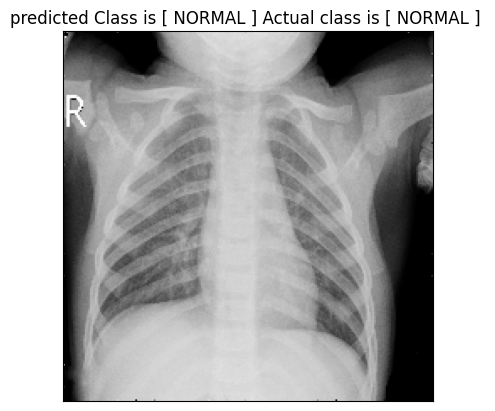

1/1 [==============================] - 0s 32ms/step
(1, 2)


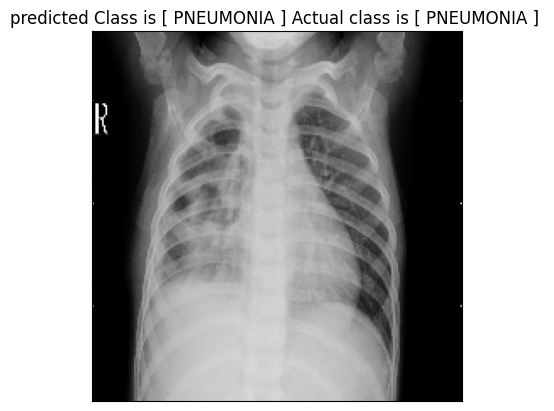

1/1 [==============================] - 0s 30ms/step
(1, 2)


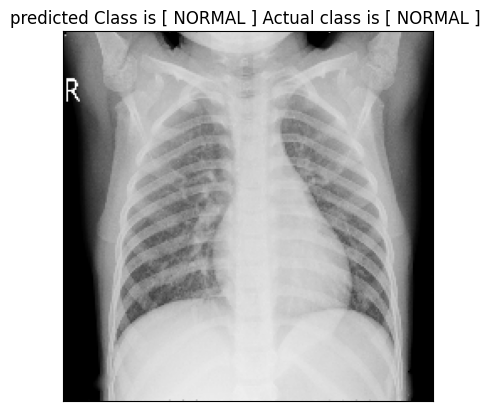

1/1 [==============================] - 0s 21ms/step
(1, 2)


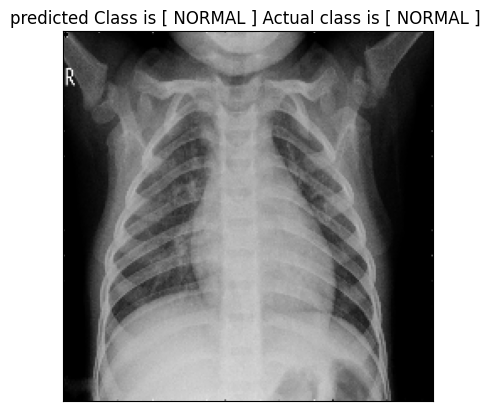

1/1 [==============================] - 0s 19ms/step
(1, 2)


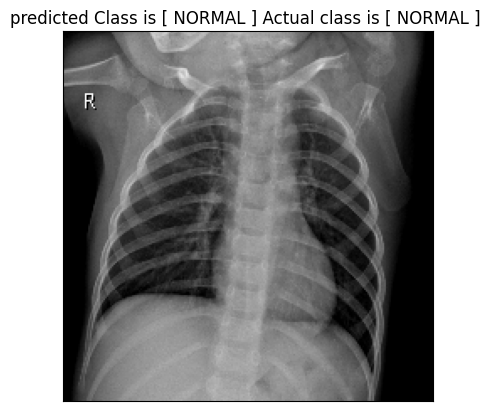

In [ ]:
predictImg()